# Lab Segmentation 2

In [1]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

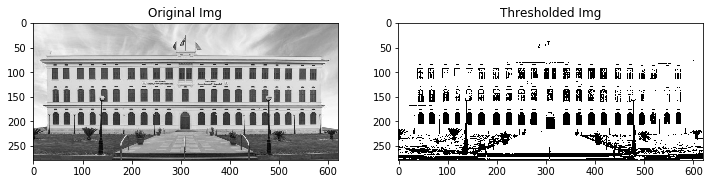

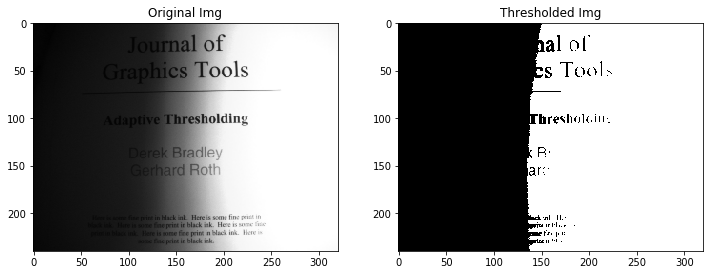

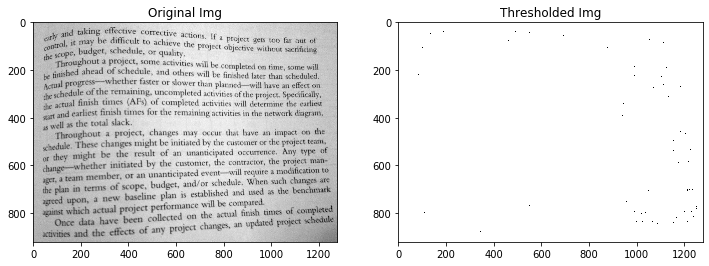

In [11]:

def getThreshold(image):
    hist,bins = np.histogram(image.ravel(),256,[0,256])
    
    Threshold_Init = round( np.sum(list(range(256)) * hist) / np.sum(hist) )
    Threshold_new = -100 #Dummy Start
    
    while True:  
        lower_Mean = round( np.sum(list(range(0,int(Threshold_Init))) * hist[0:int(Threshold_Init)]) / np.sum(hist) )
        higher_Mean = round( np.sum(list(range(int(Threshold_Init),256)) * hist[int(Threshold_Init):256]) / np.sum(hist) )
        Threshold_Init = (lower_Mean + higher_Mean) / 2
        if(abs(Threshold_new - Threshold_Init) < 2):  
            return Threshold_Init
            break
        else:
            Threshold_new = Threshold_Init

img = (io.imread('cufe.png', as_gray=True) * 255).astype(np.uint8)
binaryImg = img > (getThreshold(img))
show_images([img, binaryImg],['Original Img','Thresholded Img'])

img = io.imread('book.png', as_gray=True)
binaryImg = img > (getThreshold(img))
show_images([img, binaryImg],['Original Img','Thresholded Img'])

img = (io.imread('book1.png', as_gray=True) * 255).astype(np.uint8)
binaryImg = img > (getThreshold(img))
show_images([img, binaryImg],['Original Img','Thresholded Img'])

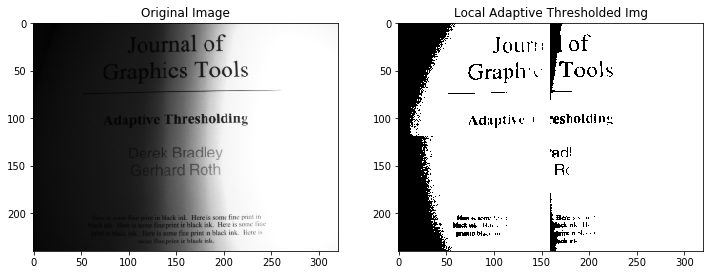

In [12]:

img = io.imread('book.png', as_gray=True)

height, width = img.shape[:2]

firstQuarter = img[0:int(height/2),0:int(width/2)]
secondQuarter = img[0:int(height/2),int(width/2):width]
thirdQuarter = img[int(height/2):height,0:int(width/2)]
fourthQuarter = img[int(height/2):height,int(width/2):width]

binaryImg1 = firstQuarter > (getThreshold(firstQuarter))
binaryImg2 = secondQuarter > (getThreshold(secondQuarter))
binaryImg3 = thirdQuarter > (getThreshold(thirdQuarter))
binaryImg4 = fourthQuarter > (getThreshold(fourthQuarter))

show_images([img,np.concatenate( (np.concatenate((binaryImg1,binaryImg2),axis=1),np.concatenate((binaryImg3,binaryImg4),axis=1)) , axis=0 )],['Original Image','Local Adaptive Thresholded Img'])

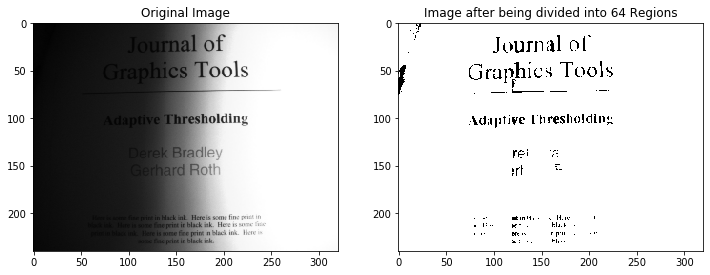

In [14]:

img = io.imread('book.png', as_gray=True)

def SegmentImage(img,n):

    if(n == 0):
        return img > (getThreshold(img))

    height, width = img.shape[:2]

    firstQuarter = img[0:int(height/2),0:int(width/2)]
    secondQuarter = img[0:int(height/2),int(width/2):width]
    thirdQuarter = img[int(height/2):height,0:int(width/2)]
    fourthQuarter = img[int(height/2):height,int(width/2):width]

    binaryImg1 = SegmentImage(firstQuarter,n-1)
    binaryImg2 = SegmentImage(secondQuarter,n-1)
    binaryImg3 = SegmentImage(thirdQuarter,n-1)
    binaryImg4 = SegmentImage(fourthQuarter,n-1)

    return np.concatenate( (np.concatenate((binaryImg1,binaryImg2),axis=1),np.concatenate((binaryImg3,binaryImg4),axis=1)) , axis=0 )

newImg = SegmentImage(img,3)
show_images([img,newImg],['Original Image','Image after being divided into 64 Regions'])